In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df = pd.read_csv('./titanic_train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [134]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)

In [135]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [136]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [137]:
df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [138]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [139]:
df['Cabin'] = df['Cabin'].str[:1]

In [140]:
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [141]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

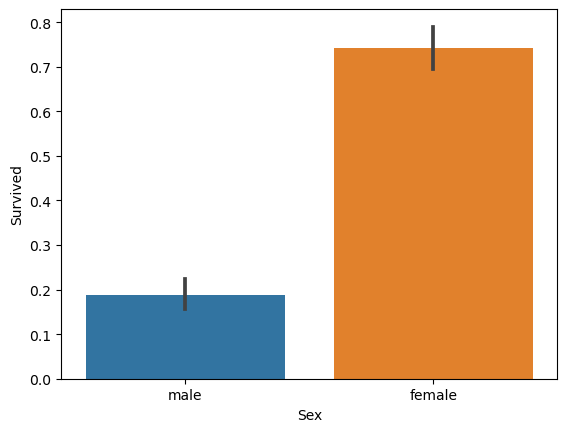

In [142]:
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

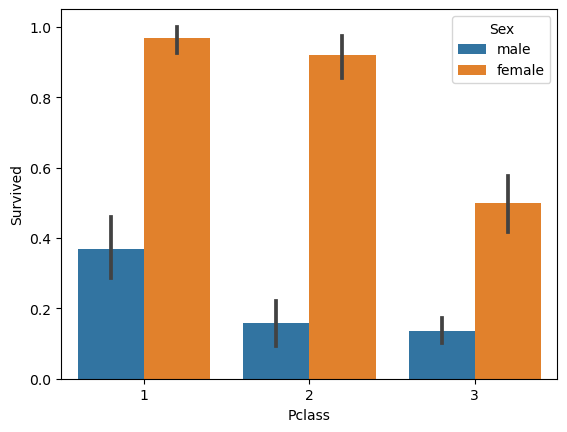

In [143]:
sns.barplot(x='Pclass', hue='Sex', y='Survived', data=df)

In [144]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

In [145]:
df['Age_cat'] = df['Age'].apply(get_category)

In [146]:
# df.drop(columns='Age_dat', inplace=True)

In [147]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,Young Adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,Young Adult


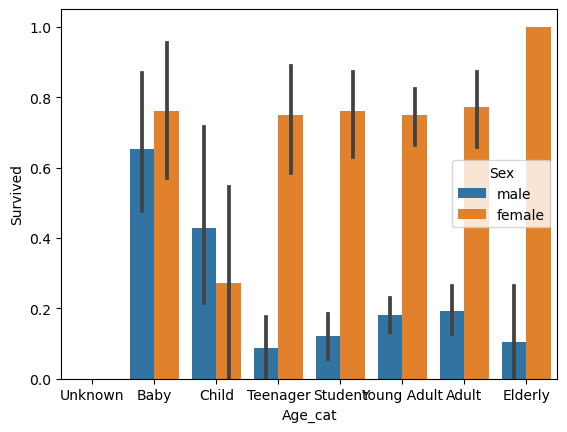

In [148]:
order_list = ['Unknown',
              'Baby',
              'Child',
              'Teenager',
              'Student',
              'Young Adult',
              'Adult',
              'Elderly']
sns.barplot(x='Age_cat',
            y='Survived',
            data=df,
            hue='Sex', order=order_list)
df.drop(columns='Age_cat', inplace=True)

In [149]:
from sklearn.preprocessing import LabelEncoder

In [150]:
def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    
    return df

In [151]:
df = encode_features(df)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0


In [152]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(columns=['PassengerId', 'Name', 'Ticket'],
            inplace=True)
    
    return df

def format_features(df):
    from sklearn.preprocessing import LabelEncoder
    
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    
    return df

In [153]:
df = pd.read_csv('./titanic_train.csv')
y = df['Survived']
x = df.drop(columns='Survived')
x = transform_features(x)

In [154]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [155]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=11)

In [158]:
y_train.value_counts(), y_test.value_counts()

(0    431
 1    281
 Name: Survived, dtype: int64,
 0    118
 1     61
 Name: Survived, dtype: int64)

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [160]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(max_iter=200)

dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
lr_clf.fit(x_train, y_train)

dt_pred = dt_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
lr_pred = lr_clf.predict(x_test)

print(f'{dt_clf.__class__.__name__} 정확도 : {accuracy_score(y_test, dt_pred)}')
print(f'{rf_clf.__class__.__name__} 정확도 : {accuracy_score(y_test, rf_pred)}')
print(f'{lr_clf.__class__.__name__} 정확도 : {accuracy_score(y_test, lr_pred)}')

DecisionTreeClassifier 정확도 : 0.7877094972067039
RandomForestClassifier 정확도 : 0.8547486033519553
LogisticRegression 정확도 : 0.8491620111731844


In [161]:
from sklearn.model_selection import KFold

def exec_kfold(x, clf, folds=5):
    kfold = KFold(n_splits = folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x)):
        x_train, x_test = x.values[train_index], x.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(x_train, y_train)
        pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print(f'교차검증 {iter_count} 정확도 : {accuracy}')
    print(f'평균 정확도 : {np.mean(scores):.4f}')
    
exec_kfold(x, dt_clf)
print('DecisionTreeClassifier 정확도 : 0.7877094972067039')
# DecisionTreeClassifier 정확도 : 0.7877094972067039

교차검증 0 정확도 : 0.7541899441340782
교차검증 1 정확도 : 0.7808988764044944
교차검증 2 정확도 : 0.7865168539325843
교차검증 3 정확도 : 0.7696629213483146
교차검증 4 정확도 : 0.8202247191011236
평균 정확도 : 0.7823
DecisionTreeClassifier 정확도 : 0.7877094972067039


In [162]:
exec_kfold(x, rf_clf)
print('RandomForestClassifier 정확도 : 0.8547486033519553')
# RandomForestClassifier 정확도 : 0.8547486033519553

교차검증 0 정확도 : 0.7932960893854749
교차검증 1 정확도 : 0.8089887640449438
교차검증 2 정확도 : 0.8370786516853933
교차검증 3 정확도 : 0.7752808988764045
교차검증 4 정확도 : 0.8595505617977528
평균 정확도 : 0.8148
RandomForestClassifier 정확도 : 0.8547486033519553


In [163]:
exec_kfold(x, lr_clf)
print('LogisticRegression 정확도 : 0.8491620111731844')
# LogisticRegression 정확도 : 0.8491620111731844

교차검증 0 정확도 : 0.8044692737430168
교차검증 1 정확도 : 0.7808988764044944
교차검증 2 정확도 : 0.7752808988764045
교차검증 3 정확도 : 0.7528089887640449
교차검증 4 정확도 : 0.8202247191011236
평균 정확도 : 0.7867
LogisticRegression 정확도 : 0.8491620111731844


In [164]:
from sklearn.model_selection import cross_val_score

In [165]:
%%time
dt_s = cross_val_score(dt_clf, x, y, cv=5)
dt_s, np.mean(dt_s)
# 평균 정확도 : 0.7823
# DecisionTreeClassifier 정확도 : 0.7877094972067039

CPU times: total: 15.6 ms
Wall time: 30.3 ms


(array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663]),
 0.7879291946519366)

In [166]:
%%time
rf_s = cross_val_score(rf_clf, x, y, cv=5)
rf_s, np.mean(rf_s)
# 평균 정확도 : 0.8148
# RandomForestClassifier 정확도 : 0.8547486033519553

CPU times: total: 688 ms
Wall time: 726 ms


(array([0.79329609, 0.79775281, 0.84831461, 0.76404494, 0.86516854]),
 0.8137153976523758)

In [167]:
%%time
lr_s = cross_val_score(lr_clf, x, y, cv=5)
lr_s, np.mean(lr_s)
# 평균 정확도 : 0.7867
# LogisticRegression 정확도 : 0.8491620111731844

CPU times: total: 78.1 ms
Wall time: 102 ms


(array([0.79329609, 0.78089888, 0.78089888, 0.76966292, 0.80898876]),
 0.7867491055175444)

In [168]:
from sklearn.model_selection import GridSearchCV

In [174]:
%%time
param = {
    'max_depth' : [2,3,9,10],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 5, 8],
}
grid_dtclf = GridSearchCV(dt_clf,
                         param_grid=param,
                         scoring='accuracy',
                         cv=5)
grid_dtclf.fit(x_train, y_train)
print('최적의 하이퍼 파라메터', grid_dtclf.best_params_)
print('최고의 정확도', grid_dtclf.best_score_)

최적의 하이퍼 파라메터 {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고의 정확도 0.7991825076332119
CPU times: total: 609 ms
Wall time: 622 ms


In [175]:
%%time
param = {
    'max_depth' : [2,3,5,10],
    'min_samples_split' : [2, 3, 5],
    'min_samples_leaf' : [1, 5, 8],
    'n_estimators' : [100, 200],
}
grid_rfclf = GridSearchCV(rf_clf,
                         param_grid=param,
                         scoring='accuracy',
                         cv=5)
grid_rfclf.fit(x_train, y_train)
print('최적의 하이퍼 파라메터', grid_rfclf.best_params_)
print('최고의 정확도', grid_rfclf.best_score_)

best_rflf = grid_rfclf.best_estimator_
deredictions = best_rflf.predict(x_test)
accuracy = accuracy_score(y_test, deredictions)
print(f'테스트 세트에서의 정확도 : {accuracy:.4f}')

최적의 하이퍼 파라메터 {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최고의 정확도 0.8145966709346991
테스트 세트에서의 정확도 : 0.8827
CPU times: total: 1min 3s
Wall time: 1min 4s
